In [90]:
import pandas as pd 
import requests
from pylab import plt, mpl
import numpy as np
import io
plt.style.use("seaborn")

/var/folders/gv/ddxy80mj6ns05__3cz883xd40000gn/T/ipykernel_1727/1432279103.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [91]:
def copy(df, header=False, index=False, sort=True, transpose=True):
    if sort:
        df.sort_index(ascending=False).T.to_clipboard(excel=True, header=header, index=index)
    else:
        df.to_clipboard(excel=True, header=header, index=index)

## Testing DataFrame

In [27]:
items = """
2023	2022	2021	2020	2019	2018	2017	2016	2015	2014	2013	2012
0.03	-0.83	3.09	0.03	0.71	-1.78	2.97	0.76	-0.64	-0.05	0.61	2.68
-0.05	-0.90	-1.16	1.04	0.56	-2.26	4.44	0.77	-0.43	0.07	0.61	2.13
"""

In [26]:
testing = pd.read_table(io.StringIO(items), sep="\s+")
(testing.loc[:, list(map(str, list(reversed(testing.columns))))]).to_clipboard(excel=True, index=False)

In [34]:
testing = pd.read_excel("/Users/tkyw/Library/Mobile Documents/com~apple~CloudDocs/Documents/work/work Doc/Due Diligence/Singular.xlsx", index_col=0, parse_dates=True).iloc[:, :-2]
testing

/var/folders/gv/ddxy80mj6ns05__3cz883xd40000gn/T/ipykernel_4590/3885666489.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testing = pd.read_excel("/Users/tkyw/Library/Mobile Documents/com~apple~CloudDocs/Documents/work/work Doc/Due Diligence/Singular.xlsx", index_col=0, parse_dates=True).iloc[:, :-2]


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
NaN,Calender Year Return,YTD,1 Year,3 Year,5 Year,7 Year,10 Year,Since Inception,2024,2023,...,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
NaN,Singular Value Fund,0.168689,0.132066,0.169167,1.004585,1.329044,1.785872,4.1586,0.168689,0.128248,...,0.310262,-0.009303,0.132295,0.074418,0.20926,0.032303,-0.055019,0.230033,0.674569,-0.258858
NaN,FBM Top 100,0.059864,0.017442,-0.07608,-0.07306,-0.061751,-0.161702,0.223979,0.059864,0.017891,...,0.1292,-0.004214,-0.025985,-0.055215,0.122199,0.104378,0.008543,0.181408,0,0
NaN,Excess Return,0.108825,0.114624,0.245247,1.077646,1.390796,1.947575,3.934621,0.108825,0.110357,...,0.181063,-0.005089,0.158279,0.129634,0.087061,-0.072075,-0.063562,0.048625,0.674569,-0.258858
NaN,Maybank 1 Year Fixed Deposit Rate,0.006192,0.025,0.075,0.125,0.175,0.25,0.425,0.025,-,...,-,-,-,-,-,-,-,-,-,-
NaN,Trailing Return,YTD,1 Year,3 Year,5 Year,7 Year,10 Year,Since Inception,2024,2023,...,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
NaN,Singular Value Fund,-,0.132066,0.053478,0.149225,0.128376,0.107889,0.10132,-,0.128248,...,0.310262,-0.009303,0.132295,0.074418,0.20926,0.032303,-0.055019,0.230033,0.674569,-0.258858
NaN,FBM Top 100,-,0.017442,-0.026032,-0.015059,-0.009064,-0.017484,0.014541,-,0.017891,...,0.1292,-0.004214,-0.025985,-0.055215,0.122199,0.104378,0.008543,0.181408,0,0
NaN,Rolling 1 Year Return,2024-03-01 00:00:00,2023-12-01 00:00:00,2023-06-01 00:00:00,2022-12-01 00:00:00,2022-06-01 00:00:00,2021-12-01 00:00:00,2021-06-01 00:00:00,2020-12-01 00:00:00,2020-06-01 00:00:00,...,2017-06-01 00:00:00,2016-12-01 00:00:00,2016-06-01 00:00:00,2015-12-01 00:00:00,2015-06-01 00:00:00,2014-12-01 00:00:00,2014-06-01 00:00:00,2013-12-01 00:00:00,2013-06-01 00:00:00,2012-12-01 00:00:00
NaN,Singular Value Fund,0.328837,0.12344,-0.013026,-0.108623,-0.068979,0.236087,0.710473,0.684148,0.078305,...,0.303633,-0.010365,0.017384,0.128947,-0.011753,0.074766,0.185759,0.216756,0.133181,0.046925


Fund        2020-03-31
Benchmark   2022-10-31
dtype: datetime64[ns]

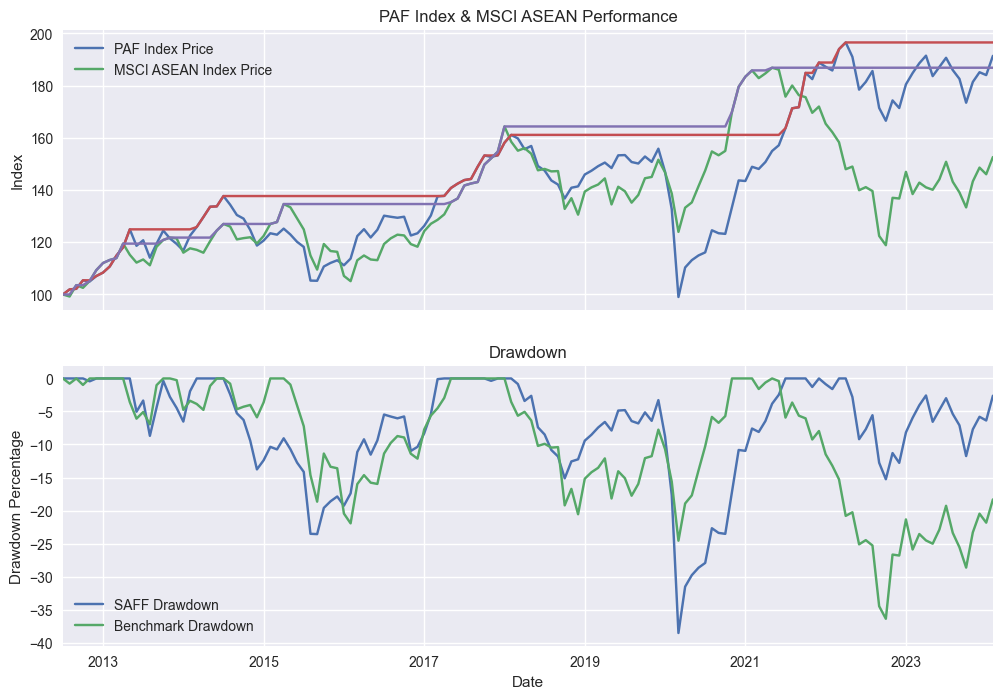

In [19]:
# testing = pd.read_table(io.StringIO(items), sep="\s+").dropna(axis=0)
# (testing.loc[:, list(map(str, list(reversed(testing.columns))))]).to_clipboard(excel=True, index=False)
# testing = testing.set_index("Date")
testing = df_new
testing = testing.dropna(axis=0) / testing.dropna(axis=0).iloc[0, :] * 100
testing_max = testing.cummax()
testing_diff = testing - testing_max
drawdown = testing_diff / testing_max * 100
# drawdown['Benchmark'] = drawdown['Benchmark1'] * 0.5 + drawdown['Benchmark2'] * 0.5
# drawdown = drawdown.iloc[:, [0,-1]]
fig, ax = plt.subplots(2,1, figsize=(12,8))
ax1 = drawdown.plot(ax=ax[1], sharex=True);
ax1.set(**{"title": "Drawdown", 'ylabel': "Drawdown Percentage"})
ax1.legend(['SAFF Drawdown', "Benchmark Drawdown"])
ax2 = testing.plot(ax=ax[0]);
ax3 = testing_max.plot(ax=ax[0]);
ax3.legend([])
ax2.set(**{"title": "PAF Index & MSCI ASEAN Performance", "ylabel": "Index"})
ax2.legend(['PAF Index Price', "MSCI ASEAN Index Price"])
drawdown.idxmin()
# drawdown

## Collecting data for fund

In [3]:
import requests

headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'dnt': '1',
    'origin': 'https://my.morningstar.com',
    'referer': 'https://my.morningstar.com/my/report/fund/performance.aspx?t=0P00008MB6&fundservcode=&lang=en-MY',
    'sec-ch-ua': '"Chromium";v="123", "Not:A-Brand";v="8"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36',
}

params = {
    'instid': 'MSSAL',
    'sdkver': '2.56.0',
    'productType': 'quikr',
    'cdt': '2',
    'country': 'MYS',
    'ed': '20240408',
    'f': 'd',
    'fields': 'HS793',
    'hasPreviousClose': 'true',
    'ipoDates': '19970806',
    'pids': '0P00008MB6',
    'sd': '19000101',
    'tickers': 'F000000AGV',
    'qs_wsid': '099CA01BFF5F186F038DBE71B8D16E5D',
    '_': '1712896674245',
}

response = requests.get('https://quotespeed.morningstar.com/ra/snChartData', params=params, headers=headers)

item = response.json()
item

{'Status': {'ErrorCode': '0', 'ErrorMsg': 'Succeeded', 'SubErrorCode': '200'},
 'Data': [{'Ticker': 'F000000AGV',
   'Frequency': 'd',
   'HasPreafter': False,
   'OpenMinutes': -1,
   'AfterMinutes': -1,
   'PreMinutes': -1,
   'CloseMinutes': -1,
   'Cdt': 2,
   'DataType': None,
   'TimeDiff': '',
   'CustomizedSymbol': '',
   'DailyData': {'HS793': [{'OriginalTime': None,
      'OriginalDate': None,
      'OriginalDateTime': None,
      'Time': 0,
      'Index': 35666,
      'Date': '19970826',
      'Open': None,
      'High': None,
      'Low': None,
      'Last': '4.72000',
      'LastMarket': None,
      'Volume': 0,
      'FillFlag': 0,
      'PreviousClosePrice': None,
      'SubDataPoints': None},
     {'OriginalTime': None,
      'OriginalDate': None,
      'OriginalDateTime': None,
      'Time': 0,
      'Index': 35667,
      'Date': '19970827',
      'Open': None,
      'High': None,
      'Low': None,
      'Last': '0.23600',
      'LastMarket': None,
      'Volume': 0,


In [58]:
items = item['Data'][0]['DailyData']['HS793']
df = pd.json_normalize(items)[['Date','Last']]
df=  df.set_index("Date")
df.index = pd.to_datetime(df.index)
df = df.astype(float)
df=  df.iloc[1:, :]
df

,Last
Date,
1997-08-27,0.23600
1997-08-28,0.23600
1997-08-29,0.23600
1997-09-01,0.23600
1997-09-02,0.23600
...,...
2024-04-02,0.91498
2024-04-03,0.92465
2024-04-04,0.92823


In [92]:
df = pd.read_csv("ASTUTE MALAYSIA GROWTH TRUST.csv", index_col=1, parse_dates=True).drop("Unnamed: 0" ,axis=1)
df.index = pd.to_datetime(df.index, format="%d/%m/%Y")
df = df.astype(float)
df

,NAV Price
NAV Date,
2024-04-12,0.2660
2024-04-09,0.2641
2024-04-08,0.2621
2024-04-05,0.2595
2024-04-04,0.2592
...,...
1997-11-24,4.7000
1997-11-21,4.7100
1997-11-20,4.7000


## Collecting data for benchmark

In [5]:
# bench = pd.read_csv("/Users/tkyw/Desktop/MSCI ex Japan.csv", index_col=0)[['Price']].replace(",", "", regex=True).astype(float)
bench1 = pd.read_csv("/Users/tkyw/Desktop/FTSE Bursa Malaysia EMAS Shariah.csv", index_col=0)[['Price']].replace(",", "", regex=True).astype(float)
# bench1 = pd.read_csv("/Users/tkyw/Desktop/FTSE 100.csv", index_col=0)[['Price']].replace(",", "", regex=True).astype(float)
# bench2 = pd.read_excel("/Users/tkyw/Desktop/MSCI Asia Index.xls", index_col=0).dropna(axis=0)

bench1.index = pd.to_datetime(bench1.index)
# bench1.index = pd.to_datetime(bench1.index)
# bench2.index = pd.to_datetime(bench2.index)
bench1

,Price
Date,
2024-04-15,11799.59
2024-04-12,11862.99
2024-04-09,11865.20
2024-04-08,11894.52
2024-04-05,11866.10
...,...
2010-05-25,8293.29
2010-05-24,8441.52
2010-05-21,8511.37


In [93]:
freqs = {
    "D": 252,
    "M": 12,
    "Q": 252/4,
}
risk_free_rate = 0.028


In [95]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
bench = pdr.get_data_yahoo("^KLSE;1=9", start = "1980-01-01", end = "2024-11-10")[['Adj Close']]
# bench2 = pdr.get_data_yahoo("^KLSE;1=9", start = "2007-01-01", end = "2024-11-10")[['Adj Close']]
# bench1 = pdr.get_data_yahoo("^KLSE;1=9", start = "2007-01-01", end = "2024-11-10")[['Adj Close']]
# bench1

risk_free_return  = ((1 + risk_free_rate) ** (1/252))
# bench2 = pd.DataFrame((np.ones_like(bench1.values) * risk_free_return).cumprod(), index=bench1.index, columns=['Risk free rate'])
bench = pd.DataFrame((np.ones_like(df.values) * risk_free_return).cumprod(), index=list(reversed(df.index)), columns=['Risk free rate'])

[*********************100%%**********************]  1 of 1 completed


In [99]:
df = df.loc[:"2024-4-01", :]
df

,NAV Price
NAV Date,
2024-03-29,0.2554
2024-03-27,0.2557
2024-03-26,0.2550
2024-03-25,0.2532
2024-03-22,0.2509
...,...
1997-11-24,4.7000
1997-11-21,4.7100
1997-11-20,4.7000


In [116]:
df.to_clipboard(excel=True)

In [115]:
(df.loc["2024"].resample("M").last().pct_change() + 1).prod() - 1

NAV Price    0.110435
dtype: float64

In [100]:
start = 1997
end = 2024
latest_date = "2024-01-31"
last_date = "2023-01-31"
first_year = str(start)
freq = freqs['D']

## Combining fund and becnhmark

In [101]:
df_new = df
df_new = pd.concat([df, bench], axis=1)
df_new.rename(columns=dict(zip(df_new.columns, ['Fund', "Benchmark"])), inplace=True)

# df_new = pd.concat([df, bench1, bench2], axis=1)
# df_new.rename(columns=dict(zip(df_new.columns, ['Fund', "Benchmark1", "Benchmark2"])), inplace=True)

df_new.to_clipboard(excel=True)

## Main function

In [102]:
def cumulative(df):
    df_rets = df.pct_change() + 1
    return (df_rets).prod() - 1

def calendar_year_return(df, latest_date, last_date, first_year, w1=1, w2=0, is_cumulative=False):
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, list(reversed(range(start, end+1))))))
    if not is_cumulative:
        df_new["YTD"] = (df.loc[latest_date.split("-")[0]].pct_change().dropna(axis=0)).sum()
        df_new["1 Year"] = (df.loc[pd.to_datetime(last_date):latest_date].resample("M").last().pct_change().dropna(axis=0)).sum()
        df_new["3 Year"] = (df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date].resample("M").last().pct_change().dropna(axis=0)).sum()
        df_new["5 Year"] = (df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date].resample("M").last().pct_change().dropna(axis=0)).sum()
        df_new["7 Year"] = (df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date].resample("M").last().pct_change().dropna(axis=0)).sum()
        df_new["10 Year"] = (df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date].resample("M").last().pct_change().dropna(axis=0)).sum()
        df_new["Since Inception"] = (df.loc[first_year:].resample("M").last().pct_change()).sum()
        for year in list(reversed(range(start, end+1))):
            df_new[str(year)] = (df.loc[str(year)].resample("M").last().pct_change()).sum()
    else:
        df_new["YTD"] = ((df.resample("M").last().pct_change().loc[latest_date.split("-")[0]].dropna(axis=0)) + 1).prod() - 1
        df_new["1 Year"] = ((df.resample("M").last().pct_change().loc[pd.to_datetime(last_date):latest_date].dropna(axis=0)) + 1).prod() -1
        df_new["3 Year"] = ((df.resample("M").last().pct_change().loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date].dropna(axis=0)) + 1).prod() -1
        df_new["5 Year"] = ((df.resample("M").last().pct_change().loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date].dropna(axis=0)) + 1).prod() -1
        df_new["7 Year"] = ((df.resample("M").last().pct_change().loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date].dropna(axis=0)) + 1).prod() -1
        df_new["10 Year"] = ((df.resample("M").last().pct_change().loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date].dropna(axis=0)) + 1).prod() -1 
        df_new["Since Inception"] = ((df.resample("M").last().pct_change().loc[first_year:]) + 1).prod() -1
        for year in list(reversed(range(start, end+1))):
            df_new[str(year)] = (df.resample("M").last().pct_change().loc[str(year)]  + 1).prod() -1
    # =====
    if w1 != 1:
        df_new.loc['Benchmark1', :] = df_new.loc['Benchmark1', :] * w1
        df_new.loc['Benchmark2', :] = df_new.loc['Benchmark2', :] * w2
        df_new.loc['Benchmark', :] =df_new.loc['Benchmark1', :] + df_new.loc['Benchmark2', :]
        df_new = df_new.iloc[[0, -1], :]
    return df_new

def rolling_return(df,w1=1,w2=0, start_date=None):
    start_date = start_date if start_date is not None else df.index[0]
    df = df.loc[start_date:, :].pct_change(periods=freq).dropna(axis=0)
    if w1 != 1:
        df["Benchmark"] = (df['Benchmark1'] * w1)  + (df['Benchmark2'] * w2)
        df = df.iloc[:, [0,-1]]
    df = df.resample("2BQ").last().sort_index(ascending=False).T
    return df


def semi_deviation(df, w1=1, w2=0):
    if w1 != 1:
        df.loc[:, 'Benchmark1'] = df.loc[:, 'Benchmark1'] * w1
        df.loc[:, 'Benchmark2'] = df.loc[:, 'Benchmark2'] * w2
        df.loc[:, 'Benchmark'] = df.loc[:, 'Benchmark1'] + df.loc[:, 'Benchmark2']
        df = df.iloc[:, [0,-1]]
    msq = (df[df < 0] ** 2).sum()
    # print(df)
    sd = (msq / (df.shape[0] - 1)) ** 0.5
    return sd
    
        
    
def downside_risk(df, latest_date, last_date, first_year, w1=1, w2=0):
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, list(reversed(range(start,end+1))))))
    df_new["YTD"] = semi_deviation((df.loc[latest_date.split("-")[0]].dropna(axis=0).resample("M").last().pct_change().dropna(axis=0)), w1=w1,w2=w2) * np.sqrt(12)
    df_new["1 Year"] = semi_deviation((df.loc[pd.to_datetime(last_date):latest_date].dropna(axis=0).resample("M").last().pct_change().dropna(axis=0)), w1=w1,w2=w2) * np.sqrt(12)
    df_new["3 Year"] = semi_deviation((df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date].dropna(axis=0).resample("M").last().pct_change().dropna(axis=0)), w1=w1,w2=w2) * np.sqrt(12)
    df_new["5 Year"] = semi_deviation((df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date].dropna(axis=0).resample("M").last().pct_change().dropna(axis=0)), w1=w1,w2=w2) * np.sqrt(12)
    df_new["7 Year"] = semi_deviation((df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date].dropna(axis=0).resample("M").last().pct_change().dropna(axis=0)), w1=w1,w2=w2) * np.sqrt(12)
    df_new["10 Year"] = semi_deviation((df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date].dropna(axis=0).resample("M").last().pct_change().dropna(axis=0)), w1=w1,w2=w2) * np.sqrt(12)
    df_new["Since Inception"] = semi_deviation((df.loc[first_year:].resample("M").last().pct_change()), w1=w1,w2=w2) * np.sqrt(12)
    
    for year in list(reversed(range(start,end+1))):
        try:
            df_new[str(year)] = semi_deviation(df.loc[str(year)].resample("M").last().pct_change(), w1=w1,w2=w2) * np.sqrt(12)
        except:
            print(df_new[str(year)])
    
    return df_new

def drawdown(df, latest_date, last_date, first_year, w1=1, w2=0):
    dfs = [
        df.loc[latest_date.split("-")[0]], 
        df.loc[pd.to_datetime(last_date):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date],
        df.loc[first_year:]
            ]
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"])

    for df_temp, col in zip(dfs, df_new):
        max_price = df_temp.dropna(axis=0).cummax()
        max_drawdown = ((df_temp.dropna(axis=0) - max_price) / max_price)
        if w1 != 1:
            max_drawdown['Benchmark'] = max_drawdown['Benchmark1'] * 0.5 + max_drawdown['Benchmark2'] * 0.5
            max_drawdown = max_drawdown.iloc[:, [0,-1]]
        max_drawdown_val = max_drawdown.min()
        df_new[col] = max_drawdown_val
    return df_new
def drawdown_duration(df, latest_date, last_date, first_year, w1=1, w2=0):
    dfs = [
        df.loc[latest_date.split("-")[0]], 
        df.loc[pd.to_datetime(last_date):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date],
        df.loc[first_year:]]
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"])
    
    for df_temp, col in zip(dfs, df_new):
        max_price = df_temp.dropna(axis=0).cummax()
        max_drawdown = ((df_temp.dropna(axis=0) - max_price) / max_price)
        if w1 != 1:
            max_drawdown['Benchmark'] = max_drawdown['Benchmark1'] * 0.5 + max_drawdown['Benchmark2'] * 0.5
            max_drawdown = max_drawdown.iloc[:, [0,-1]]
        max_drawdown_date = max_drawdown.idxmin()
        returns1 = max_drawdown.loc[max_drawdown_date.iloc[0]:, "Fund"]
        returns2 = max_drawdown.loc[max_drawdown_date.iloc[1]:, "Benchmark"]
        returns = [returns1, returns2]

        dates = []
        for ret in returns: 
            try:
                date = ret.loc[ret >= 0].dropna(axis=0).index[0]
            except IndexError:
                date = None
            dates.append(date)
        dates = pd.Series(dates, index=['Fund', 'Benchmark'])
        try:
            drawdown_dn =(dates - max_drawdown_date)
        except:
            drawdown_dn = pd.Series(dates, index=['Fund', 'Benchmark'])
        df_new[col] = drawdown_dn
    return df_new

def rets(df, w1=1,w2=0, freq="M"):
    if w1 != 1:
        if freq == "DM":
            df = df.pct_change()    
        else: 
            df = df.resample(freq).last().pct_change()
        df['Benchmark'] = df['Benchmark1'] * w1 + df['Benchmark2'] * w2
        df = df.iloc[:, [0,-1]]
        return df
    else:
        return df.resample(freq).last().pct_change() if freq != "DM" else df.pct_change()

def annalised_std(df, df_rets, latest_date, last_date, first_year ,w1, w2):
    years = list(reversed(range(start,end+1)))
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, years)))
    dfs = [
    df.loc[latest_date.split("-")[0]], 
    df.loc[pd.to_datetime(last_date):latest_date],
    df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date],
    df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date],
    df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date],
    df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date],
    df.loc[first_year:]
            ]
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, years)))
    for df, col in zip(dfs, df_new.columns[:8]):
        df_new[col] = rets(df, w1, w2).std() * np.sqrt(12)
    print((df_rets.resample("Y").agg(np.std) * np.sqrt(12)).sort_index(ascending=False).values.T)
    df_new.loc[:, list(map(str,years))] =  (df_rets.resample("Y").agg(np.std) * np.sqrt(12)).sort_index(ascending=False).values.T
    return df_new

def beta(df, latest_date, last_date, first_year, w1=1, w2=0):
    dfs = [
        df.loc[latest_date.split("-")[0]], 
        df.loc[pd.to_datetime(last_date):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date],
        df.loc[first_year:]
            ]
    years = list(reversed(range(start,end+1)))
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, years)))
    for df, col in zip(dfs, df_new.columns[:8]):
        df_rets = rets(df, w1, w2, freq="DM")
        df_rets_nona = df_rets.dropna(axis=0)
        try:
            # print(col)
            beta, intercept = np.polyfit(y=df_rets_nona['Fund'], x=df_rets_nona['Benchmark'], deg=1)
        except:
            # print(col)
            ...
        df_new[col] = [beta]
    
    for year in years:
        df_active = rets(df.loc[str(year)], w1,w2, freq="DM").dropna(axis=0)
        try:
            beta, intercept = np.polyfit(y=df_active['Fund'], x=df_active['Benchmark'], deg=1)
        except:
            beta = np.nan
        df_new[str(year)] = [beta]
    
    return df_new
def tracking_error(df, latest_date, last_date, first_year, w1=1, w2=0):
    dfs = [
        df.loc[latest_date.split("-")[0]], 
        df.loc[pd.to_datetime(last_date):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date],
        df.loc[first_year:]
            ]
    years = list(reversed(range(start,end+1)))
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, years)))
    for df, col in zip(dfs, df_new.columns[:8]):
        df_active = rets(df, w1, w2).dropna(axis=0)
        try:
            df_active['alpha'] = df_active['Fund'] - df_active['Benchmark']
            tracking_error = df_active['alpha'].std()
        except:
            print(col)
        df_new[col] = [tracking_error * np.sqrt(12)]
    
    for year in years:
        df_active = rets(df.loc[str(year)], w1, w2).dropna(axis=0)
        try:
            df_active['alpha'] = df_active['Fund'] - df_active['Benchmark']
            tracking_error = df_active['alpha'].std()
            az_error = tracking_error * np.sqrt(12)
        except:
            az_error = np.nan
        df_new[str(year)] = [az_error]
    return df_new

def sharpe_ratio(df, latest_date, last_date, first_year, w1=1, w2=0):
    dfs = [
        df.loc[latest_date.split("-")[0]], 
        df.loc[pd.to_datetime(last_date):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date],
        df.loc[first_year:]
            ]
    years = list(reversed(range(start,end+1)))
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, years)))
    for df, col in zip(dfs, df_new.columns[:8]):
        df_active = rets(df.dropna(axis=0), w1, w2).dropna(axis=0)
        try:
            df_sharpe = df_active - (risk_free_rate/12)
            annualized_sharpe_ratio = (df_sharpe.mean() / df_sharpe.std()) * np.sqrt(12)
        except:
            print(col)
        df_new[col] = annualized_sharpe_ratio
    
    for year in years:
        df_active = rets(df.loc[str(year)].dropna(axis=0), w1, w2).dropna(axis=0)
        try:
            df_sharpe = df_active - (risk_free_rate/12)
            annualized_sharpe_ratio = (df_sharpe.mean() / df_sharpe.std()) * np.sqrt(12)
        except:
            annualized_sharpe_ratio = np.nan
        df_new[str(year)] = annualized_sharpe_ratio
    return df_new

def treynor_ratio(df, latest_date, last_date, first_year, w1=1, w2=0):
    dfs = [
        df.loc[latest_date.split("-")[0]], 
        df.loc[pd.to_datetime(last_date):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date],
        df.loc[first_year:]
            ]
    years = list(reversed(range(start,end+1)))
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, years)))
    for df, col in zip(dfs, df_new.columns[:8]):
        df_active = rets(df.dropna(axis=0).resample("M").last(), w1, w2).dropna(axis=0)
        df_beta_rets = rets(df.dropna(axis=0), w1, w2, freq="DM").dropna(axis=0)
        beta, intercept = np.polyfit(x=df_beta_rets['Fund'], y=df_beta_rets['Benchmark'], deg=1)
        annualized_treynor = (((df_active.mean()  *12) - risk_free_rate) / beta)
        df_new[col] = annualized_treynor
    
    for year in years:
        df_active = rets(df.loc[str(year)].dropna(axis=0).resample("M").last(), w1, w2).dropna(axis=0)
        df_beta_rets = rets(df.loc[str(year)].dropna(axis=0), w1, w2, freq="DM").dropna(axis=0)
        try:
            beta, intercept = np.polyfit(x=df_beta_rets['Fund'], y=df_beta_rets['Benchmark'], deg=1)
            annualized_treynor = (((df_active.mean()  *12) - risk_free_rate) / beta)
        except:
            annualized_treynor = np.nan
        df_new[str(year)] = annualized_treynor
    return df_new

def information_ratio(df, latest_date, last_date, first_year, w1=1, w2=0):
    dfs = [
        
        df.loc[latest_date.split("-")[0]], 
        df.loc[pd.to_datetime(last_date):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date],
        df.loc[first_year:]
            ]
    years = list(reversed(range(start,end+1)))
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, years)))
    for df, col in zip(dfs, df_new.columns[:8]):
        df_active = rets(df.dropna(axis=0), w1, w2).dropna(axis=0)
        df_active['alpha'] = df_active['Fund'] - df_active['Benchmark']
        tracking_error = df_active['alpha'].std()
        print(df_active)
        information_ratio = (df_active['alpha'].mean() / tracking_error) * np.sqrt(12)
        df_new[col] = [information_ratio]
    
    for year in years:
        df_active = rets(df.loc[str(year)].dropna(axis=0), w1, w2).dropna(axis=0)
        try:
            df_active['alpha'] = df_active['Fund'] - df_active['Benchmark']
            tracking_error = df_active['alpha'].std()
            information_ratio = (df_active['alpha'].mean() / tracking_error) * np.sqrt(12)
        except:
            information_ratio = np.nan
        df_new[str(year)] = [information_ratio]
    return df_new

def geomean(df):
    df += 1
    return (df.prod() ** (1 / df.shape[0])) - 1

def capture_ratio(df, latest_date, last_date, first_year, w1=1, w2=0):
    dfs = [
        df.loc[latest_date.split("-")[0]], 
        df.loc[pd.to_datetime(last_date):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date],
        df.loc[first_year:]
            ]
    years = list(reversed(range(start,end+1)))
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, years)))
    for df, col in zip(dfs, df_new.columns[:8]):
        try:
            df_active = rets(df.dropna(axis=0).resample("M").last(), w1, w2).dropna(axis=0)
            upside = df_active.query("Benchmark > 0")
            upside_geo = geomean(upside)
            upside_capture = upside_geo['Fund'] / upside_geo['Benchmark']
            downside = df_active.query("Benchmark <= 0")
            downside_geo = geomean(downside)
            downside_capture = downside_geo['Fund'] / downside_geo['Benchmark']
            capture_ratio = upside_capture / downside_capture
            infos = pd.Series([upside_capture, downside_capture, capture_ratio])
            df_new[col] = infos
        except ZeroDivisionError:
            upside_capture = np.nan
            downside_capture = np.nan
            capture_ratio = np.nan
    
    for year in years:
        df_active = rets(df.loc[str(year)].dropna(axis=0).resample("M").last(), w1, w2).dropna(axis=0)
        if df_active.shape[0] != 0:
            try:
                upside = df_active.query("Benchmark > 0")
                upside_geo = geomean(upside)
                upside_capture = upside_geo['Fund'] / upside_geo['Benchmark']
                # print(upside_capture)
                downside = df_active.query("Benchmark <= 0")
                downside_geo = geomean(downside)
                downside_capture = downside_geo['Fund'] / downside_geo['Benchmark']
                # print(downside_capture)
                capture_ratio = upside_capture / downside_capture
            except ZeroDivisionError:
                upside_capture = np.nan
                downside_capture = np.nan
                capture_ratio = np.nan
        else:
            upside_capture = np.nan
            downside_capture = np.nan
            capture_ratio = np.nan
        df_new[str(year)] = [upside_capture, downside_capture, capture_ratio]
    return df_new

def batting_average(df, latest_date, last_date, first_year, w1=1, w2=0):
    dfs = [
        df.loc[latest_date.split("-")[0]], 
        df.loc[pd.to_datetime(last_date):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=3):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=5):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=7):latest_date],
        df.loc[pd.to_datetime(latest_date) - pd.DateOffset(years=10):latest_date],
        df.loc[first_year:]
            ]
    years = list(reversed(range(start,end+1)))
    df_new = pd.DataFrame(columns=['YTD', "1 Year", "3 Year", "5 Year", "7 Year", "10 Year", "Since Inception"] + list(map(str, years)))
    for df, col in zip(dfs, df_new.columns[:8]):
        df_active = rets(df.dropna(axis=0).resample("M").last(), w1, w2).dropna(axis=0)
        df_active['alpha'] = df_active['Fund'] - df_active['Benchmark']
        batting_average = df_active.query("alpha > 0").shape[0] / df_active.shape[0]
        df_new[col] = [batting_average]
    
    for year in years:
        df_active = rets(df.loc[str(year)].dropna(axis=0).resample("M").first(), w1, w2).dropna(axis=0)
        if df_active.shape[0] != 0:
            df_active['alpha'] = df_active['Fund'] - df_active['Benchmark']        
            batting_average = df_active.query("alpha > 0").shape[0] / df_active.shape[0]
        else:
            batting_average = np.nan
        df_new[str(year)] = [batting_average]
    return df_new

## Output

In [103]:
w1 = 1
w2 = 1 - w1

### Calendar year return

In [104]:
calendar_return  = calendar_year_return(df_new, latest_date, last_date, first_year, is_cumulative=True,w1=w1, w2=w2)
calendar_return = calendar_return.loc[["Fund", "Benchmark"], :]
copy(calendar_return, sort=False)
# df_new

### Rolling Return

In [76]:
# copy(rolling_return(df_new, w1=0.5, w2=0.5, start_date="2009-01-01"), sort=False)
# rolling_return(df_new, w1=0.5, w2=0.5, start_date="2009-01-01")
rolling_returns = rolling_return(df_new, start_date="2011-01-31", w1=w1, w2=w2)
copy(rolling_returns, sort=False)
rolling_returns

,2024-06-28,2023-12-29,2023-06-30,2022-12-30,2022-06-30,2021-12-31,2021-06-30,2020-12-31,2020-06-30,2019-12-31,...,2016-06-30,2015-12-31,2015-06-30,2014-12-31,2014-06-30,2013-12-31,2013-06-28,2012-12-31,2012-06-29,2011-12-30
Fund,0.037965,0.037308,0.030327,0.01966,0.01503,0.0163,0.017877,0.022371,0.029915,0.028283,...,0.024225,0.021639,0.019288,0.019899,0.018803,0.019411,0.018265,0.018143,0.018759,0.018262
Benchmark,0.037000,0.037000,0.037000,0.03700,0.03700,0.0370,0.037000,0.037000,0.037000,0.037000,...,0.037000,0.037000,0.037000,0.037000,0.037000,0.037000,0.037000,0.037000,0.037000,0.037000


### Standard Deviation

In [77]:
df_rets = rets(df_new, w1=w1, w2=w2)
# df_rets.loc["2024":, :]
# rets(df_new.loc[latest_date.split("-")[0]], w1,w2)

In [78]:
annualised_stds = annalised_std(df_new, df_rets, latest_date=latest_date, last_date=last_date, first_year=first_year, w1=w1, w2=w2)
copy(annualised_stds, sort=False)
annualised_stds

[[0.00261844 0.00103679 0.00137701 0.00094873 0.00158653 0.00057674
  0.00036743 0.00059626 0.00069527 0.00115361 0.0007307  0.00093064
  0.00070934 0.00153117 0.00099639 0.00152152 0.00101814 0.00295978
  0.00247133]
 [0.00278286 0.00073472 0.00140985 0.00096412 0.00153346 0.00206644
  0.00072392 0.00045159 0.00033819 0.00045159 0.00045159 0.00045159
  0.00033819 0.00045159 0.0010282  0.00064157 0.00049968 0.00155812
  0.00066581]]


,YTD,1 Year,3 Year,5 Year,7 Year,10 Year,Since Inception,2024,2023,2022,...,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
Fund,0.002191,0.001177,0.002011,0.001869,0.001730,0.001555,0.002150,0.002618,0.001037,0.001377,...,0.001154,0.000731,0.000931,0.000709,0.001531,0.000996,0.001522,0.001018,0.00296,0.002471
Benchmark,0.003044,0.000719,0.002478,0.002252,0.002197,0.002026,0.001978,0.002783,0.000735,0.00141,...,0.000452,0.000452,0.000452,0.000338,0.000452,0.001028,0.000642,0.0005,0.001558,0.000666


### Downside Risk

In [79]:
downside = downside_risk(df_new, latest_date, last_date, first_year, w1=w1, w2=w2)
copy(downside, sort=False)

### Max drawdown

In [80]:
drawdowns = drawdown(df_new, latest_date, last_date, first_year, w1=w1, w2=w2)
copy(drawdowns, sort=False)

### Max Drawdown Duration

In [81]:
durations = drawdown_duration(df_new, latest_date, last_date, first_year, w1=w1, w2=w2)
copy(durations, sort=False)

In [201]:
df_new.to_clipboard(excel=True)

### Beta

In [82]:
betas = beta(df_new, latest_date, last_date, first_year, w1=w1, w2=w2)
copy(betas, sort=False)

/var/folders/gv/ddxy80mj6ns05__3cz883xd40000gn/T/ipykernel_1727/4210370810.py:182: RankWarning: Polyfit may be poorly conditioned
  beta, intercept = np.polyfit(y=df_rets_nona['Fund'], x=df_rets_nona['Benchmark'], deg=1)
/var/folders/gv/ddxy80mj6ns05__3cz883xd40000gn/T/ipykernel_1727/4210370810.py:182: RankWarning: Polyfit may be poorly conditioned
  beta, intercept = np.polyfit(y=df_rets_nona['Fund'], x=df_rets_nona['Benchmark'], deg=1)
/var/folders/gv/ddxy80mj6ns05__3cz883xd40000gn/T/ipykernel_1727/4210370810.py:182: RankWarning: Polyfit may be poorly conditioned
  beta, intercept = np.polyfit(y=df_rets_nona['Fund'], x=df_rets_nona['Benchmark'], deg=1)
/var/folders/gv/ddxy80mj6ns05__3cz883xd40000gn/T/ipykernel_1727/4210370810.py:182: RankWarning: Polyfit may be poorly conditioned
  beta, intercept = np.polyfit(y=df_rets_nona['Fund'], x=df_rets_nona['Benchmark'], deg=1)
/var/folders/gv/ddxy80mj6ns05__3cz883xd40000gn/T/ipykernel_1727/4210370810.py:182: RankWarning: Polyfit may be poorl

## Active Return

### Tracking Error

In [83]:
tracking_errors = tracking_error(df_new, latest_date, last_date, first_year, w1=w1, w2=w2)
copy(tracking_errors,sort=False)

### Sharpe Ratio

In [84]:
sharpe_ratios = sharpe_ratio(df_new, latest_date, last_date, first_year, w1=w1, w2=w2)
copy(sharpe_ratios, sort=False)

In [259]:
df_active = df_new.loc["2023-01-3": "2024-01-02"].dropna(axis=0).resample("M").first().pct_change().dropna(axis=0)
# df_active = df_new.loc["2023"].dropna(axis=0).resample("M").first().pct_change().dropna(axis=0)
df_sharpe = df_active - (0.025/12)
annualized_sharpe_ratio = (df_sharpe.mean() / df_sharpe.std()) * np.sqrt(12)
copy(annualized_sharpe_ratio.to_frame(), sort=False)
annualized_sharpe_ratio

Fund         -0.503428
Benchmark1    0.003357
Benchmark2    0.039423
dtype: float64

In [ ]:
years = list(reversed(range(2007, 2024)))
sharpes = pd.DataFrame(columns=years, index=["sharpe_svf", "sharpe_svf_fbm"])
for year in years:
    df_active = df_new.loc[str(year)].dropna(axis=0).resample("M").first().pct_change().dropna(axis=0)
    df_sharpe = df_active - (0.025/12)
    annualized_sharpe_ratio = (df_sharpe.mean() / df_sharpe.std()) * np.sqrt(12)
    sharpes[year] = annualized_sharpe_ratio.values
copy(sharpes, sort=False)
sharpes

### Treynor Ratio

In [85]:
treynor_ratios = treynor_ratio(df_new, latest_date, last_date, first_year, w1=w1, w2=w2)
copy(treynor_ratios, sort=False)

In [ ]:
df_active = df_new.loc["2021-01-3": "2024-01-02"].dropna(axis=0).resample("M").first().pct_change().dropna(axis=0)
beta, intercept = np.polyfit(x=df_active['Price'], y=df_active['Last'], deg=1)
betas = pd.DataFrame({"Last": beta, "Price": 1}, index=[0])
annualized_treynor = (((df_active.mean()  *12) - 0.025) / betas)
copy(annualized_treynor, sort=False)
annualized_treynor

In [ ]:
years = list(reversed(range(2010, 2024)))
treynors = pd.DataFrame(columns=years, index=["sharpe_svf", "sharpe_svf_fbm"])
for year in years:
    df_active = df_new.loc[str(year)].dropna(axis=0).resample("M").first().pct_change().dropna(axis=0)
    beta, intercept = np.polyfit(x=df_active['Price'], y=df_active['Last'], deg=1)
    betas = pd.DataFrame({"Last": beta, "Price": 1}, index=[0])
    annualized_treynor = (((df_active.mean()  *12) - 0.025) / betas)
    treynors[year] = annualized_treynor.values[0]
copy(treynors, sort=False)
treynors

### Information Ratio

In [86]:
information_ratios = information_ratio(df_new, latest_date, last_date, first_year, w1=w1, w2=w2)
copy(information_ratios, sort=False)


                Fund  Benchmark     alpha
2024-02-29  0.002506   0.002743 -0.000237
2024-03-31  0.003000   0.002888  0.000112
2024-04-30  0.001745   0.001298  0.000446
                Fund  Benchmark     alpha
2023-02-28  0.002857   0.002599  0.000259
2023-03-31  0.002849   0.003322 -0.000473
2023-04-30  0.002841   0.002599  0.000242
2023-05-31  0.003090   0.002888  0.000203
2023-06-30  0.003081   0.002888  0.000193
2023-07-31  0.003071   0.002888  0.000184
2023-08-31  0.003062   0.003032  0.000030
2023-09-30  0.002289   0.002888 -0.000598
2023-10-31  0.003553   0.003177  0.000376
2023-11-30  0.002782   0.003032 -0.000250
2023-12-31  0.002774   0.002888 -0.000113
2024-01-31  0.003521   0.003032  0.000489
                Fund  Benchmark     alpha
2021-02-28  0.001638   0.003466 -0.001828
2021-03-31  0.001908   0.004190 -0.002282
2021-04-30  0.002448   0.004335 -0.001886
2021-05-31  0.002171   0.004479 -0.002308
2021-06-30  0.002166   0.004335 -0.002168
2021-07-31  0.002162   0.004190 -0

In [87]:
df_active = df_new.loc["2010-01-3": "2024-01-2"].dropna(axis=0).pct_change().dropna(axis=0)
df_active['alpha'] = df_active['Last'] - df_active['Price']
tracking_error = df_active['alpha'].std()
information_ratio = df_active['alpha'].mean() / tracking_error
# tracking_error * np.sqrt(df_active.shape[0])
# copy(information_ratio * np.sqrt(freq), sort=False)
tracking_error * np.sqrt(freq)

KeyError: 'Last'

In [ ]:
years = list(reversed(range(2007, 2024)))
errors = pd.DataFrame(columns=years, index=["tracking error"])
for year in years:
    df_active = df_new.loc[str(year)].dropna(axis=0).pct_change().dropna(axis=0)
    df_active['alpha'] = df_active['Last'] - df_active['Price']
    tracking_error = df_active['alpha'].std()
    information_ratio = df_active['alpha'].mean() / tracking_error
    errors[year] = information_ratio
copy(errors, sort=False)

### Capture Ratio

In [88]:
capture_ratios = capture_ratio(df_new, latest_date, last_date, first_year, w1=w1, w2=w2)
copy(capture_ratios, sort=False)
capture_ratios

,YTD,1 Year,3 Year,5 Year,7 Year,10 Year,Since Inception,2024,2023,2022,...,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Batting Average

In [154]:
import pyperclip

In [89]:
batting_averages = batting_average(df_new, latest_date, last_date, first_year, w1=w1, w2=w2)
copy(batting_averages, sort=False)


In [322]:
print(pd.to_datetime("2024-01-3") - pd.DateOffset(years=3))
df_active = rets(df_new.loc["2021-01-3": "2024-01-02"].dropna(axis=0).resample("M").first(), w1=0.5,w2=0.5).dropna(axis=0)
df_active['alpha'] = df_active['Fund'] - df_active['Benchmark']
batting_average = df_active.query("alpha > 0").shape[0] / df_active.shape[0]
batting_average

2021-01-03 00:00:00


0.4444444444444444

In [ ]:
years = list(reversed(range(2010, 2024)))
bats = pd.DataFrame(columns=years, index=['Batting Average'])
for year in years:
        df_active = df_new.loc[str(year)].dropna(axis=0).resample("M").first().pct_change().dropna(axis=0)
        df_active['alpha'] = df_active['Last'] - df_active['Price']        
        batting_average = df_active.query("alpha > 0").shape[0] / df_active.shape[0]
        bats[year] = batting_average
copy(bats, sort=False, index=False)